# Project Id: PRCP-1016-HeartDiseasePred

### Data Analysis Report
- Dataset is clean with no major missing or duplicate values; patient_id was removed as it has no predictive value.
- Age is mostly normally distributed, while serum cholesterol and oldpeak show natural right skewness.
- Only serum cholesterol shows mild genuine outliers; others were kept as they are clinically valid.
- Categorical features have reasonable distributions and reflect real-world medical data.
- Key features like chest pain type, oldpeak, slope, number of vessels, and max heart rate show strong relation with the target.
- Moderate correlations were acceptable, so no features were removed.
- Scaling was applied only to continuous numeric features after train–test split.
- Data is well-prepared and ready for model building.

### Importing libraries and loading dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_1 = pd.read_csv('values.csv')
file_2 = pd.read_csv('labels.csv')

In [3]:
print(file_1.columns)
print(file_2.columns)

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')
Index(['patient_id', 'heart_disease_present'], dtype='object')


- Because the columns of both the csv files don't match, instead of using pd.concat we manually add the target column from file_2 to file_1

In [4]:
df = file_1.copy()
df['heart_disease_present'] = file_2['heart_disease_present'].values

#### Feature Description

| Feature Name | Description |
|-------------|------------|
| age | Age of the patient (in years) |
| sex | Gender of the patient (1 = male, 0 = female) |
| chest_pain_type | Type of chest pain experienced |
| resting_blood_pressure | Resting blood pressure (mm Hg) |
| serum_cholesterol_mg_per_dl | Serum cholesterol level (mg/dl) |
| fasting_blood_sugar_gt_120_mg_dl | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) |
| resting_ekg_results | Resting electrocardiographic test result |
| max_heart_rate_achieved | Maximum heart rate achieved |
| exercise_induced_angina | Angina induced by exercise (1 = yes, 0 = no) |
| oldpeak_eq_st_depression | ST depression induced by exercise |
| slope_of_peak_exercise_st_segment | Slope of the peak exercise ST segment |
| num_major_vessels | Number of major vessels colored by fluoroscopy |
| thal | Thallium stress test result (categorical) |
| heart_disease_present | Target variable indicating heart disease (1 = yes, 0 = no) |

### Exploratory Data Analysis

In [5]:
df.sample(8)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
71,ik7hfs,1,normal,112,4,0,0,0,204,0.1,1,47,143,0,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
117,9dqkpy,1,reversible_defect,110,4,0,0,2,172,0.0,1,41,158,0,1
37,tpuevg,1,normal,124,4,0,0,0,209,0.0,0,62,163,0,0
67,f70grj,2,normal,115,4,0,0,0,303,1.2,1,43,181,0,0
54,27oevk,1,normal,130,4,0,0,2,330,0.0,0,61,169,0,1
166,y3m2bd,1,reversible_defect,132,4,0,0,0,207,0.0,1,57,168,1,0
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0


- After merging two csv files there are total 15 columns with 1 target feature and other 14 input features.
- Among the random samples generated no null values found.

In [6]:
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])

Rows: 180
Columns: 15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

- In the dataset, total 13 numerical columns, including binary type.
- Two features with object datatype of which thal needs to be converted to numerical and patienti_id remains as it is
- The target variable heart_disease_present has binary values (0:disease not present   1: disease present)
- Hence, for model creation we use Classification models.

In [8]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


- Age is moderately spread, indicating the dataset covers both middle-aged and elderly patients.
- Serum cholesterol shows high variability, suggesting the presence of extreme but realistic values.
- Max heart rate achieved has a wide range, reflecting different cardiovascular fitness levels.
- Oldpeak (ST depression) is right-skewed, with most patients having low depression values.
- Exercise-induced angina is mostly absent, indicating fewer patients experience angina during exercise.
- Resting ECG results are concentrated in fewer categories, showing limited variation.
- Target variable (heart_disease_present) is binary and reasonably distributed, suitable for classification modeling.
- No abnormal minimum or maximum values are observed, indicating data consistency.

In [9]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [10]:
df.duplicated().any()

False

- No null values found.
- No duplicate rows/entries present in the dataset

In [11]:
df['thal'].value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [12]:
df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [13]:
num_cols = ['age', 'serum_cholesterol_mg_per_dl', 'resting_blood_pressure', 'max_heart_rate_achieved']

cat_bin = ['sex', 'chest_pain_type', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 
           'exercise_induced_angina', 'slope_of_peak_exercise_st_segment']

#### Bivariate Analysis

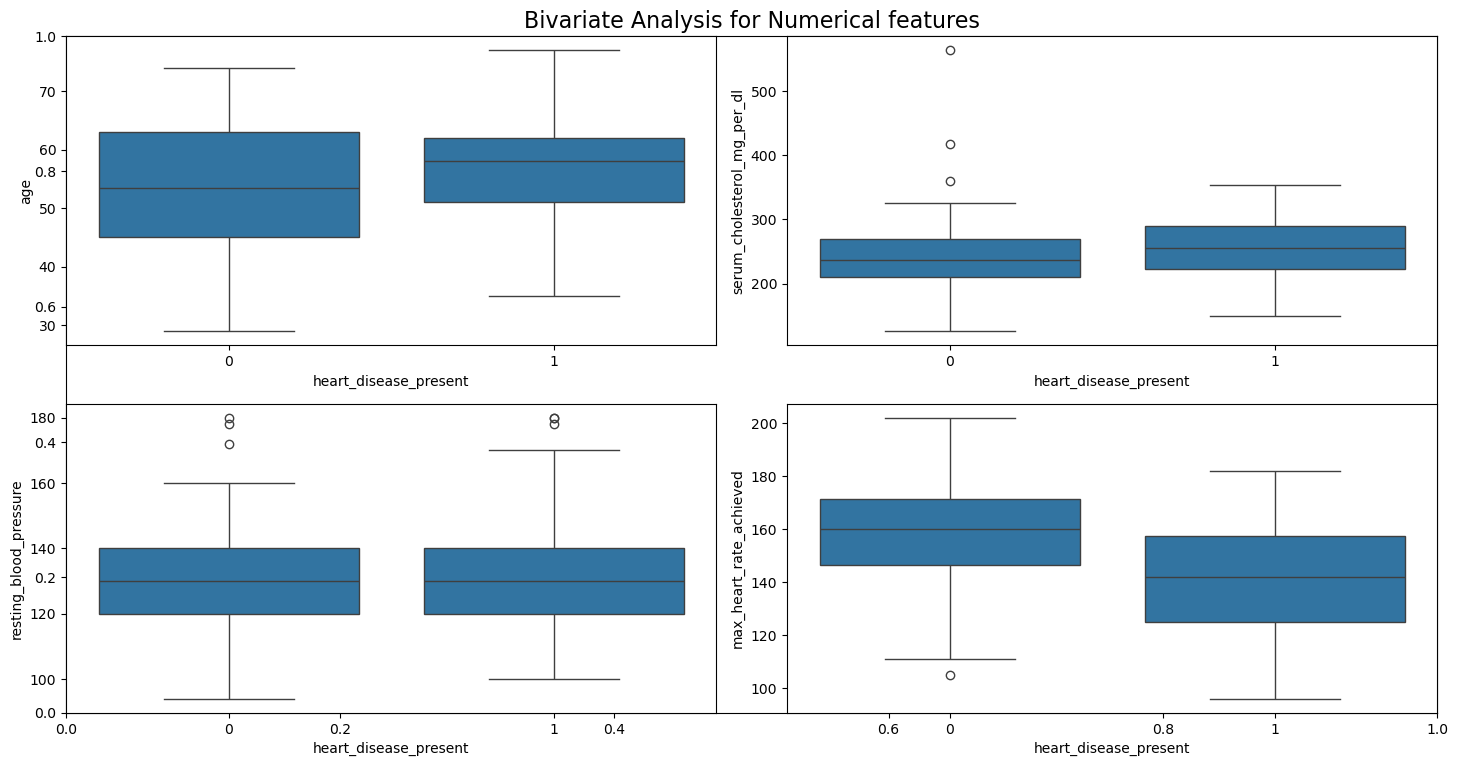

In [14]:
plt.figure(figsize=(15,8))
plt.title('Bivariate Analysis for Numerical features', fontsize=16)

for i,c in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x='heart_disease_present', y=c, data=df)

plt.tight_layout()
plt.show()

- Age shows higher median values for patients with heart disease, indicating increasing risk with age.
- Maximum heart rate achieved shows clear median separation, with lower values observed among diseased patients.
- ST depression exhibits noticeable upward shifts for the positive target class, suggesting strong predictive relevance.
- Serum cholesterol displays substantial overlap between classes, indicating weak standalone discriminatory power.
- Resting blood pressure shows limited median separation, suggesting a modest relationship with the target.

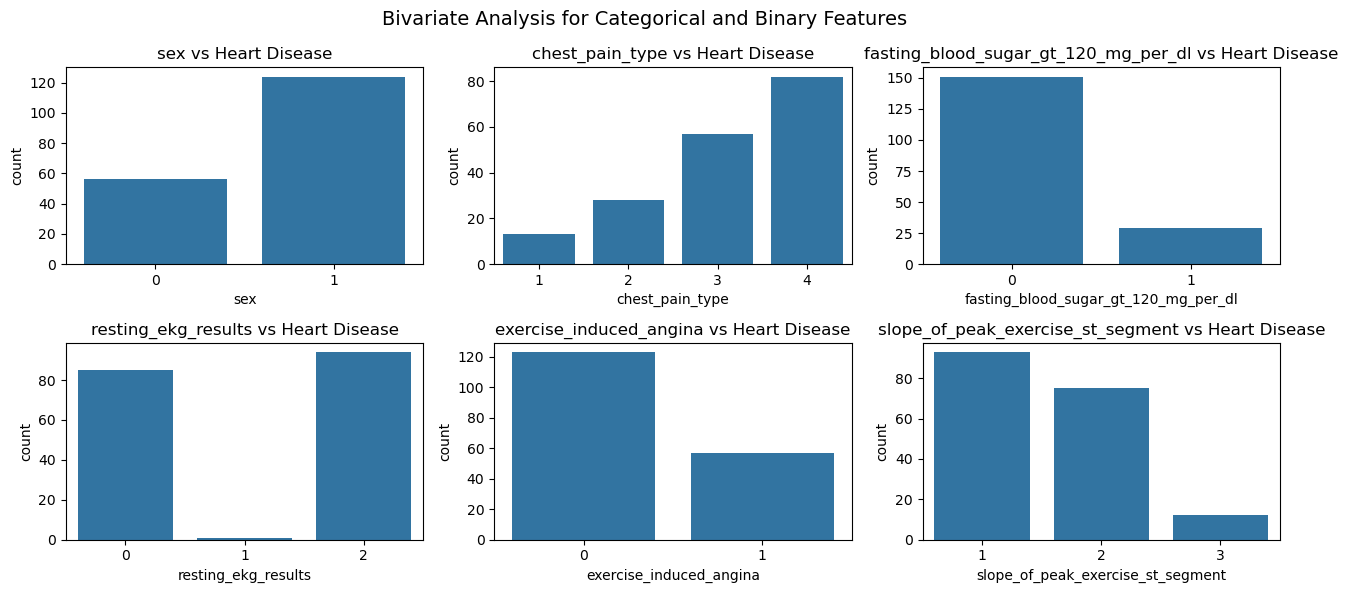

In [15]:
plt.figure(figsize=(13,6))
plt.suptitle('Bivariate Analysis for Categorical and Binary Features', fontsize=14)
for i,c in enumerate(cat_bin, 1):
    plt.subplot(2,3,i)
    sns.countplot(x=c, data=df)
    plt.title(f'{c} vs Heart Disease')

plt.tight_layout()
plt.show()

- Chest pain type shows strong class-wise differentiation, making it one of the most influential categorical features.
- Exercise-induced angina is more prevalent among patients with heart disease, indicating a strong association.
- Slope of peak exercise exhibits clear variation across the target classes, supporting its predictive importance.
- Sex shows moderate imbalance across target classes, suggesting partial influence on heart disease occurrence.
- Resting ECG categories show mild variation across the target, indicating limited but non-negligible relevance.

#### Univariate Analysis

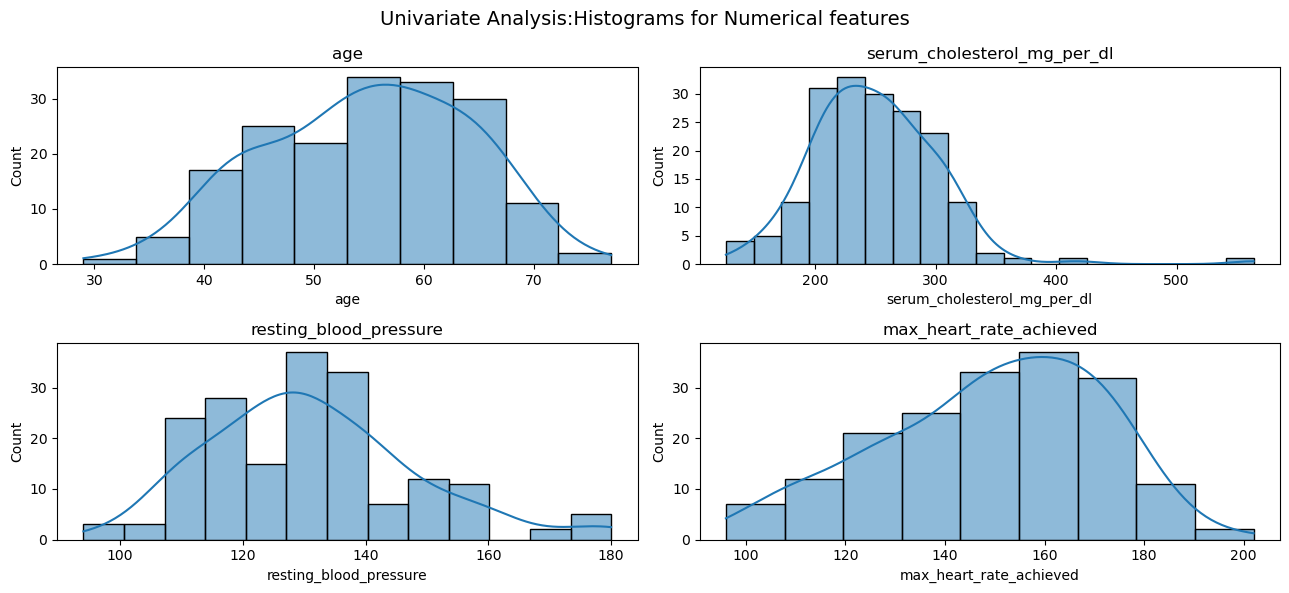

In [16]:
plt.figure(figsize=(13,6))
plt.suptitle('Univariate Analysis:Histograms for Numerical features', fontsize=14)

for i,col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'{col}')
    
plt.tight_layout()
plt.show()

- The distribution of age is approximately bell-shaped with most patients falling between 45 and 65 years, indicating higher representation of middle-aged to older individuals.
- The distribution of serum_cholesterol_mg_per_dl is right-skewed with a long tail and a few extremely high values, suggesting the presence of outliers.
- resting_blood_pressure values are mildly right-skewed, with most observations clustered between 110 and 140 mmHg and a few higher readings.
- The max_hear_rate_achieved distribution is slightly left-skewed, with most patients achieving heart rates between 140 and 170 bpm.

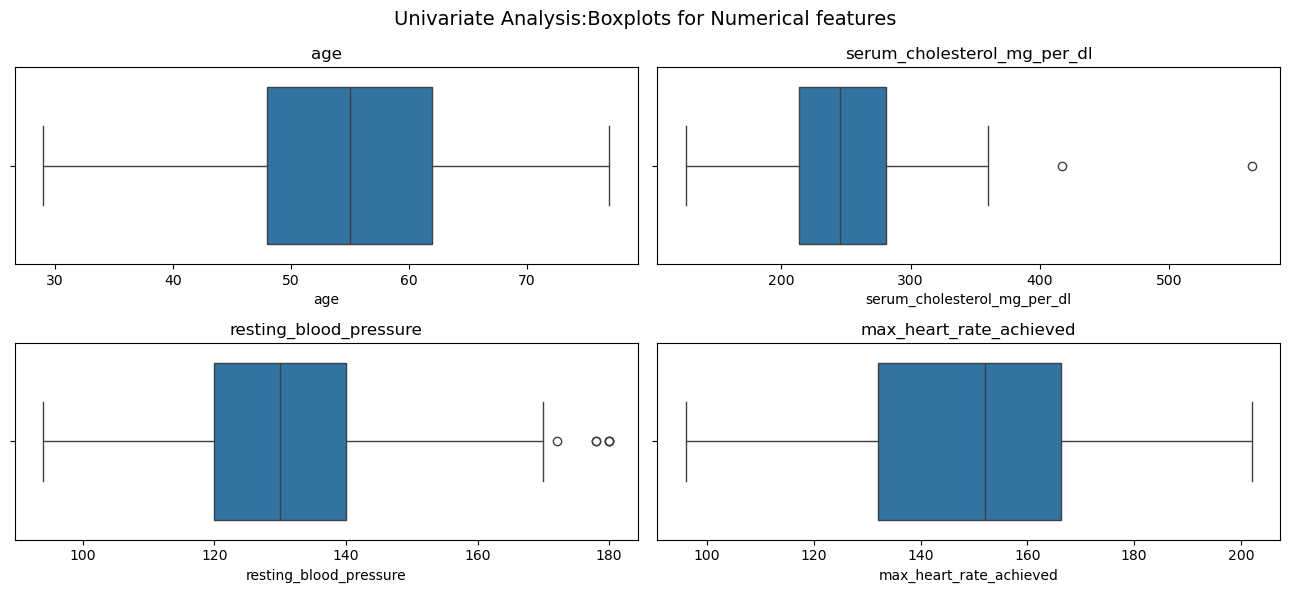

In [17]:
plt.figure(figsize=(13,6))
plt.suptitle('Univariate Analysis:Boxplots for Numerical features', fontsize=14)

for i,col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

- The median age lies in the mid-50s with a moderate interquartile range and no extreme outliers, indicating a stable age distribution.
- Several high-value outliers are presentin serum_cholesterol_mg_per_dl, indicating unusually high cholesterol levels for a few patients.
- The resting_blood_pressure distribution shows moderate spread with a few high-end outliers, reflecting variability among patients.
- The max_heart_rate_achieved feature shows a wide range with a fairly symmetric distribution and minimal outliers.

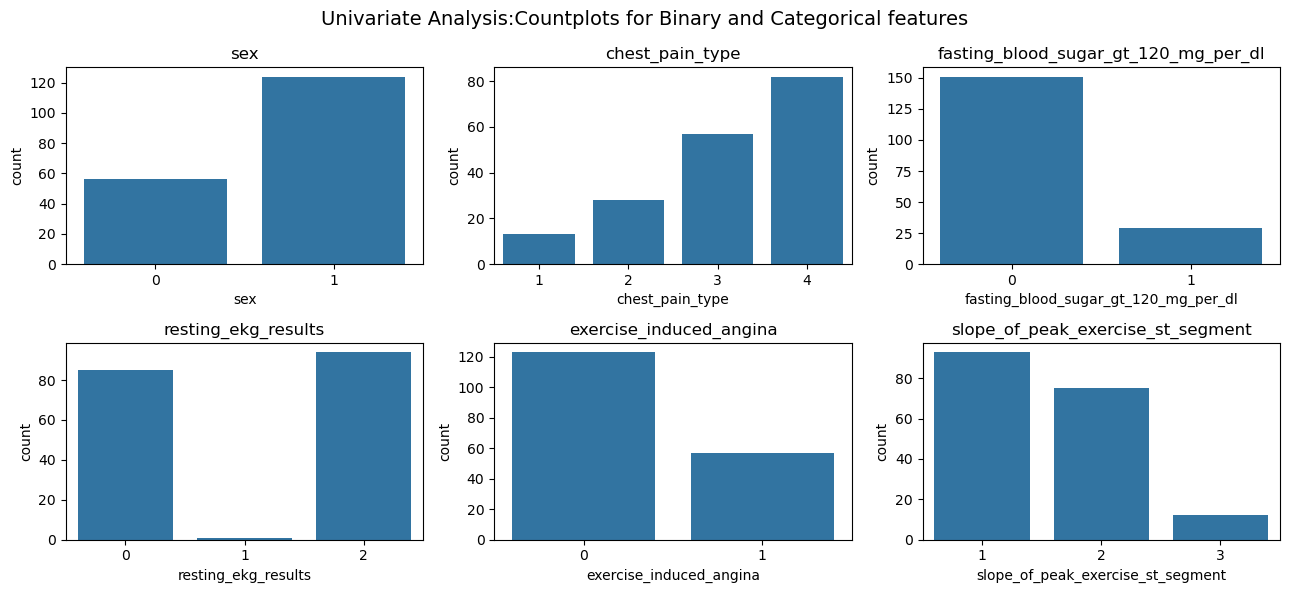

In [18]:
plt.figure(figsize=(13,6))
plt.suptitle('Univariate Analysis:Countplots for Binary and Categorical features', fontsize=14)

for i,col in enumerate(cat_bin, 1):
    plt.subplot(2,3,i)
    sns.countplot(x=df[col])
    plt.title(f'{col}')
    
plt.tight_layout()
plt.show()

- Male patients are more prevalent than female patients, indicating gender imbalance in the dataset.
- Higher chest pain categories occur more frequently, showing an uneven distribution across types.
- Most patients fall below the threshold, indicating that elevated fasting blood sugar is less common.
- The majority of patients do not experience exercise-induced angina, indicating class imbalance.

#### Correlation Heatmap

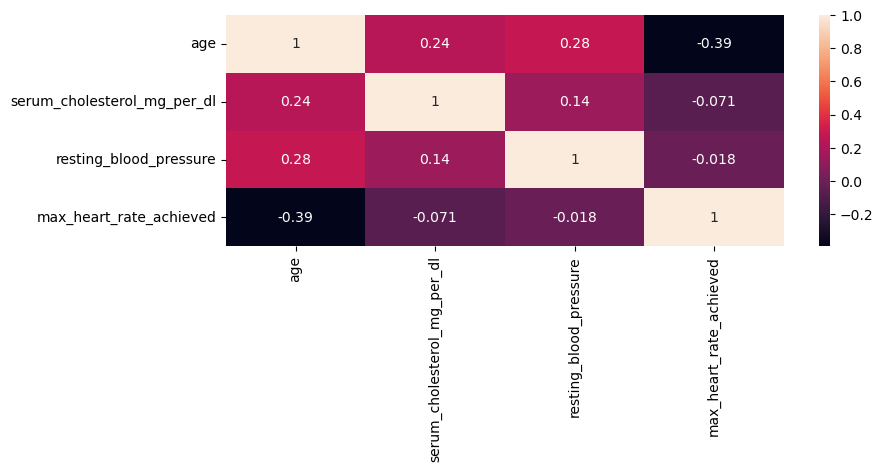

In [19]:
plt.figure(figsize=(9,3))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

- Age vs Max Heart Rate Achieved: Strong negative correlation (-0.39). As age increases, the maximum heart rate achieved tends to decrease.
- Age vs Blood Pressure / Cholesterol: Low positive correlations (0.28 with BP, 0.24 with cholesterol), showing slight increase with age.
- Blood Pressure vs Cholesterol: Very weak positive correlation (0.14), almost independent.
- Max Heart Rate Achieved vs Others: Slight negative correlations with age and cholesterol; almost no correlation with blood pressure.

### Outlier Detection

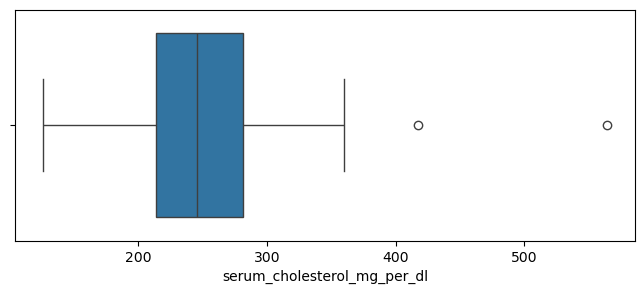

In [25]:
plt.figure(figsize=(8,3))
sns.boxplot(df['serum_cholesterol_mg_per_dl'], orient='h')
plt.show()

- Serum cholesterol exhibits extreme outliers in the boxplot; therefore, capping we use capping to limit their influence while preserving all data points.

In [29]:
q1 = df['serum_cholesterol_mg_per_dl'].quantile(0.25)
q3 = df['serum_cholesterol_mg_per_dl'].quantile(0.75)
iqr = q3 - q1

lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr

df[(df['serum_cholesterol_mg_per_dl'] < lb) | (df['serum_cholesterol_mg_per_dl'] > ub)]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
43,yx0q6k,1,normal,140,3,1,1,2,417,0.8,0,65,157,0,0
60,rv6siv,2,reversible_defect,115,3,0,0,2,564,1.6,0,67,160,0,0


### Data Preprocessing

#### Datatype Conversion

In [30]:
df['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [31]:
df['thal'] = df['thal'].map({'normal':0, 'reversible_defect':1,'fixed_defect':2})

- Categorical variables were encoded to convert non-numeric medical attributes into a machine-readable format for model training.
- Outliers in other numerical features were retained as they fall within clinically plausible ranges.

#### Dropping unwanted columns

In [32]:
df.drop(columns='patient_id', axis=1, inplace=True)

In [33]:
df['heart_disease_present'].value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

- The target variable is fairly balanced. Therefore no need to further balance the data.

#### Outlier Handling

In [34]:
df['serum_cholesterol_mg_per_dl'] = df['serum_cholesterol_mg_per_dl'].clip(lower=lb, upper=ub)

- Serum cholesterol showed extreme values in the boxplot; hence capping was applied to reduce their influence while preserving clinically valid observations.

#### Feature Scaling

In [41]:
x = df.drop('heart_disease_present', axis=1)
y = df['heart_disease_present']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

- Train–test split was performed before preprocessing to ensure unbiased model evaluation.

In [44]:
scale_cols = ['age', 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'max_heart_rate_achieved', 'oldpeak_eq_st_depression']

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
x_train[scale_cols] = scaler.fit_transform(x_train[scale_cols])
x_test[scale_cols] = scaler.transform(x_test[scale_cols])

- StandardScaler was fitted on the training data and applied to the test data to prevent data leakage and ensure fair model evaluation.

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [48]:
lr.fit(x_train, y_train)

LogisticRegression()

In [49]:
y_pred_lr = lr.predict(x_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

In [51]:
print('F1 score:', f1_score(y_test, y_pred_lr))

F1 score: 0.8648648648648649


In [52]:
print(confusion_matrix(y_test, y_pred_lr))

[[15  1]
 [ 4 16]]


In [53]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.80      0.86        20

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



- Achieves balanced precision and recall, indicating stable generalization after correcting preprocessing leakage.
- Slightly lower recall for Class 1 highlights the risk of false negatives, which is critical in heart disease prediction.
- High interpretability allows clear understanding of how clinical features influence predictions.
- Simpler structure reduces overfitting risk compared to complex models with similar performance.

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
rf_param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

In [56]:
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

In [57]:
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 7, 9],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [200, 300, 400]},
             scoring='f1')

In [58]:
rf_grid.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

In [59]:
best_rf = rf_grid.best_estimator_

In [60]:
y_pred_rf = best_rf.predict(x_test)

In [61]:
print('F1 scoer:', f1_score(y_test, y_pred_rf))

F1 scoer: 0.8235294117647058


In [62]:
print(confusion_matrix(y_test, y_pred_rf))

[[16  0]
 [ 6 14]]


In [63]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36



- Shows comparable F1-score to Logistic Regression, indicating no substantial performance gain despite higher complexity.
- Confusion matrix suggests improved handling of nonlinear interactions but without significant recall improvement for Class 1.
- Model complexity may limit interpretability, which is less desirable in medical decision-making contexts.

### XGBoost

In [64]:
from xgboost import XGBClassifier

In [65]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

In [66]:
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [67]:
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [68]:
xgb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [69]:
xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 150,
 'subsample': 0.8}

In [70]:
best_xgb = xgb_grid.best_estimator_
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [71]:
y_pred_xgb = best_xgb.predict(x_test)

In [72]:
print('F1 score:', f1_score(y_test, y_pred_xgb))

F1 score: 0.8235294117647058


In [73]:
print(confusion_matrix(y_test, y_pred_xgb))

[[16  0]
 [ 6 14]]


In [74]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36



- Delivers performance similar to Random Forest, confirming robustness but not clear superiority.
- Slight improvements in some metrics do not translate into meaningful reduction of false negatives.
- Higher computational and tuning complexity offers limited practical advantage for this dataset.

### Support Vector Machine

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [76]:
pipeline = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])

In [77]:
svm_param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.01, 0.1, 1],
    'svm__kernel': ['rbf', 'linear']}

In [78]:
svm_grid = GridSearchCV(pipeline, svm_param_grid, cv=5, scoring='f1')

In [79]:
svm_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': [0.01, 0.1, 1],
                         'svm__kernel': ['rbf', 'linear']},
             scoring='f1')

In [80]:
best_svm = svm_grid.best_estimator_
best_svm

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1, gamma=0.1))])

In [81]:
y_pred_svm = best_svm.predict(x_test)

In [82]:
print('F1 score:', f1_score(y_test, y_pred_svm))

F1 score: 0.8235294117647058


In [83]:
print(confusion_matrix(y_test, y_pred_svm))

[[16  0]
 [ 6 14]]


In [84]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36



- The classification report shows balanced precision across classes, indicating stable predictions without strong class bias.
- Recall for Class 1 is relatively lower, as reflected in the confusion matrix by the presence of false negatives.
- False negatives are critical in heart disease prediction, as missed positive cases may delay diagnosis and treatment.
- Overall F1-score is comparable to other models, but no significant improvement is observed to justify higher model complexity.

In [85]:
models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "SVM": y_pred_svm
}

results = []

for model, y_pred in models.items():
    results.append({
        "Model": model,
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted")
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
results_df

,Model,Precision,Recall,F1 Score
0,Logistic Regression,0.873753,0.861111,0.861433
1,Random Forest,0.878788,0.833333,0.831785
2,XGBoost,0.878788,0.833333,0.831785
3,SVM,0.878788,0.833333,0.831785


#### Metric & Real-World Considerations
- False negatives in heart disease prediction can delay treatment, posing serious real-world risks.
- Optimizing for higher recall on the positive class may be more appropriate than maximizing overall accuracy or F1-score.
- Logistic Regression allows easy threshold adjustment to prioritize recall when required.

#### Best Model
- Logistic Regression was selected due to its competitive performance combined with strong interpretability.
- Comparable F1-scores across all models indicate limited benefit from increased model complexity.
- Key features such as age, chest pain type, exercise-induced angina, and ST depression consistently influenced predictions.
- The final model balances predictive performance, clinical interpretability, and deployment simplicity.
- Overall, the project demonstrates that simpler models can be equally effective and more trustworthy in healthcare applications.

### Suggestions for the company
- Increase dataset size and diversity to improve model generalization and robustness.
- Include longitudinal (time-based) patient data to better capture disease progression.
- Add more clinical features such as family history, lifestyle habits, and medication details.
- Clearly document feature definitions and medical thresholds for better interpretability.
- Address class imbalance (if any) through better sampling or data collection strategies.
- Provide external validation data to test model performance on unseen populations.
- Ensure consistent data encoding to reduce preprocessing complexity.
- Periodically update the dataset to reflect recent clinical practices and patient trends.